# mini-project 2 robot localization
## setup
This project uses a Hidden Markov Model(HMM)

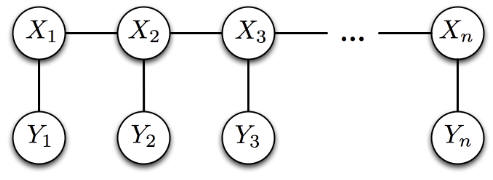

In [2]:
from IPython.display import Image
Image("HMM_pic.jpg")

The robot can move around inside a grid of size 12 times 8.

A hidden state includes a current position $Z_i$ and the last action the robot took $A_i$

An observation is the current position of the robot but it is a noisy one. The true position could be one cell off from the observed one. This means all the adjacent cells and the true cell are equally likely to be observed. In other words, the cell you observed and all its adjacent cells are equally likely to be the true position. The last action can't be observed.

Given the last action it took, the probability distribution of the next action it will take varies.

## analysis of part a
Often in a HMM we have

$p_{X_{1},\dots ,X_{n},Y_{1},\dots ,Y_{n}}(x_{1},\dots ,x_{n},y_{1},\dots ,y_{n})$ = $p_{X_{1}}(x_{1})\bigg\{ \prod _{i=1}^{n}p_{Y\mid X}(y_{i}\mid x_{i})\bigg\} \bigg\{ \prod _{i=1}^{n-1}p_{X_{\text {next}}\mid X_{\text {current}}}(x_{i+1}\mid x_{i})\bigg\} $

There are three components

1. initial state distribution $P_{X_1}(x_1)$: the number of values the initial position can take is 12 x 8, equally likely. and the initial action is set to **stay** by the specification.
2. observation distribution $P_{Y_i \mid X_i}(y_i \mid x_i)$: this means given a true hidden state what is the probability of a particular position you will observe? This info is also given by the specification. This is a matrix since for each $X_i$ it can take 96 positions and in each position it can take at most 5 last actions.
3. transition distribution $P_{X_{next} \mid X_{current}}(x_{i+1} \mid x_{i})$: from the specification we know that given the current position and the last action of the robot, the probability distribution of the next action is deterministic, and given the next action we know the next position, thus $P_{X_{next} \mid X_{current}}(x_{i+1} \mid x_{i})$ can be obtained. This is a square matrix. I think most of its entries are zeros because for each position the robot can only move to the adjacent cells in the next time step.

Up to now the part (a) can be coded up by following the sum-product algorithm.
## catch
When calculating a message for a particular value that $X_i$ can take, which is an entry in message table for time step $i$, the summation we need to do is very few because the positions in which the robot was are at most five, plus the actions, the number of values the previous state can take is not going to inflate a lot. e.g. if the last action is **stay** then the previous position can only be the current position, and the previous state can at most take from five candidates. 

Because of the sparsity in the matrix caused by this fact, for each time step $i$, I chose a dictionary instead of a matrix to represent the transition distribution. Same choice was made for observation distribution. For transition it's a nested dict, the outter one has current states as key and the inner one has next states as keys. For observation it's a plain dict because observations were made at each time step i.e. $Y_i$ can only take on a single value.
## how to speed up
The answer is **caching**. There are several parts that can be reused in more than one procedure. This requires some careful thinking.